In [34]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [35]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [36]:
IMAGE_SIZE = [224, 224]
train_path = 'train'
valid_path = 'validation'

In [37]:
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [38]:
for layer in densenet.layers:
    layer.trainable = False

In [39]:

folders = glob('C:\\Users\\HOME\\Desktop\\train\\*')

In [40]:
folders

['C:\\Users\\HOME\\Desktop\\train\\Healthy',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Bacterial blight',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Blast',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Brownspot',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Tungro',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Bacterial blight',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Blast',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Brownspot',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Tungro']

In [41]:

x = Flatten()(densenet.output)

In [42]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=densenet.input, outputs=prediction)

In [43]:
prediction

<KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'dense_1')>

In [44]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                           

In [45]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [53]:
training_set = train_datagen.flow_from_directory('Desktop/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2826 images belonging to 9 classes.


In [55]:
test_set = test_datagen.flow_from_directory('Desktop/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 180 images belonging to 9 classes.


In [58]:
test_set.filenames

['Healthy\\IMG_20190419_172952.jpg',
 'Healthy\\IMG_20190419_173344.jpg',
 'Healthy\\IMG_20190419_173904.jpg',
 'Healthy\\IMG_20190419_174133.jpg',
 'Healthy\\IMG_20190419_174218.jpg',
 'Healthy\\IMG_20190419_174308.jpg',
 'Healthy\\IMG_20190420_193425.jpg',
 'Healthy\\IMG_20190420_194105.jpg',
 'Healthy\\IMG_20190420_194338.jpg',
 'Healthy\\IMG_20190420_200326.jpg',
 'Healthy\\IMG_20190420_200436.jpg',
 'Healthy\\IMG_20190420_200508.jpg',
 'Healthy\\IMG_20190421_195322.jpg',
 'Healthy\\IMG_20190424_125921.jpg',
 'Healthy\\IMG_20190424_130047.jpg',
 'Healthy\\IMG_20190424_130138.jpg',
 'Healthy\\IMG_20190424_130226.jpg',
 'Healthy\\IMG_20190424_130350.jpg',
 'Healthy\\IMG_20190424_130430.jpg',
 'Healthy\\IMG_20190424_130546.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_167.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_183.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_187.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_191.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_192.jpg',


In [59]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HOME\AppData\Local\Temp\ipykernel_7944\1167563505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
89/89 [==============================] - 286s 3s/step - loss: 1.9420 - accuracy: 0.7183 - val_loss: 1.2417 - val_accuracy: 0.7722
Epoch 2/50
89/89 [==============================] - 296s 3s/step - loss: 0.8829 - accuracy: 0.8595 - val_loss: 0.5200 - val_accuracy: 0.9056
Epoch 3/50
89/89 [==============================] - 293s 3s/step - loss: 0.8288 - accuracy: 0.8907 - val_loss: 0.4033 - val_accuracy: 0.9278
Epoch 4/50
89/89 [==============================] - 279s 3s/step - loss: 1.1330 - accuracy: 0.8687 - val_loss: 0.6402 - val_accuracy: 0.9222
Epoch 5/50
89/89 [==============================] - 269s 3s/step - loss: 0.9863 - accuracy: 0.8984 - val_loss: 0.2841 - val_accuracy: 0.9556
Epoch 6/50
89/89 [==============================] - 292s 3s/step - loss: 0.9009 - accuracy: 0.9073 - val_loss: 0.4666 - val_accuracy: 0.9389
Epoch 7/50
89/89 [==============================] - 253s 3s/step - loss: 0.9594 - accuracy: 0.9098 - val_loss: 0.8084 - val_accuracy: 0.9222
Epoch 8/50
89

In [66]:
import matplotlib.pyplot as plt

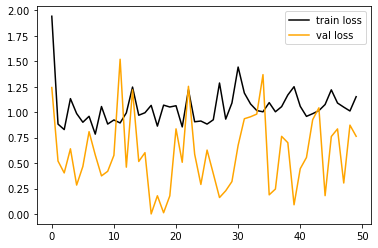

<Figure size 432x288 with 0 Axes>

In [67]:
plt.plot(r.history['loss'], label='train loss',color="black")
plt.plot(r.history['val_loss'], label='val loss',color="orange")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




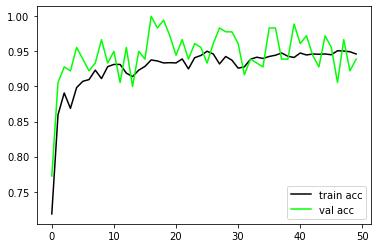

<Figure size 432x288 with 0 Axes>

In [68]:
plt.plot(r.history['accuracy'], label='train acc',color="black")
plt.plot(r.history['val_accuracy'], label='val acc',color="lime")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [69]:

from tensorflow.keras.models import load_model

model.save('model_DenseNet121.h5')

In [70]:
model=load_model('model_DenseNet121.h5')

In [71]:
y_pred = model.predict(test_set)
y_pred

6/6 [==============================] - 19s 3s/step


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.3990537e-27, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [72]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 7, 3, 3, 3, 7,
       7, 3, 7, 3, 7, 7, 3, 7, 7, 7, 3, 3, 3, 7, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8], dtype=int64)

In [74]:
import os
path ='desktop/validation'
Diseases_types=os.listdir(path)

In [75]:
diseases = []
for i in Diseases_types:
  all_images = os.listdir(path + '/' +i)

  for j in all_images :
    diseases.append((i))
    print (diseases)

['Healthy']
['Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy

In [76]:
diseases

['Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',


In [77]:
from sklearn.preprocessing import LabelEncoder
diseases = np.array(diseases)
diseases.reshape(180,-1)
y_labelencoder = LabelEncoder()



In [78]:
diseases

array(['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild Blast', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild Blast', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild B

In [79]:
y_test = y_labelencoder.fit_transform (diseases)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8], dtype=int64)

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        20
           3       1.00      0.50      0.67        20
           4       1.00      1.00      1.00        20
           5       0.95      1.00      0.98        20
           6       1.00      1.00      1.00        20
           7       0.67      1.00      0.80        20
           8       1.00      1.00      1.00        20

    accuracy                           0.94       180
   macro avg       0.96      0.94      0.94       180
weighted avg       0.96      0.94      0.94       180



In [82]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8533333333333333

In [83]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='micro')

0.9388888888888889

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9388888888888889

In [85]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='micro')

0.9388888888888889

In [86]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average='micro')

0.9388888888888889

In [87]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [88]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Healthy','Mild Bacterial blight','Mild Blast','Mild Brownspot','Mild Tungro','Severe Bacterial blight','Severe Blast','Severe Brownspot','Severe Tungro'], 
                     columns = ['Healthy','Mild Bacterial blight','Mild Blast','Mild Brownspot','Mild Tungro','Severe Bacterial blight','Severe Blast','Severe Brownspot','Severe Tungro'])

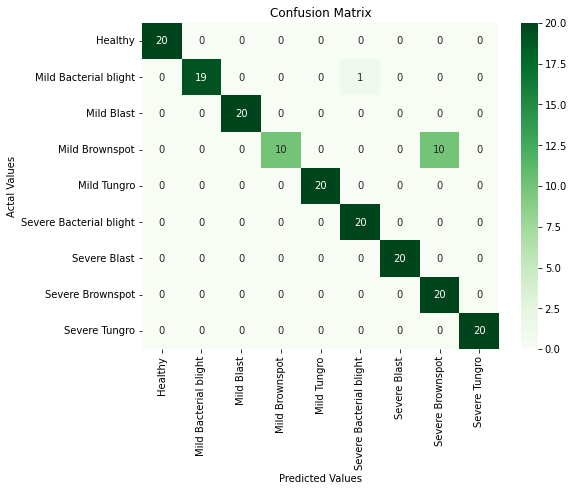

In [89]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [99]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [116]:
img=image.load_img('test_img.jfif',target_size=(224,224))

In [117]:
x=image.img_to_array(img)
x

array([[[ 54.,  91.,  48.],
        [ 52.,  89.,  46.],
        [ 47.,  79.,  42.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  1.,   1.,   1.]],

       [[ 53.,  90.,  47.],
        [ 51.,  88.,  45.],
        [ 46.,  78.,  41.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  1.,   1.,   1.]],

       [[ 51.,  86.,  46.],
        [ 49.,  84.,  44.],
        [ 42.,  74.,  37.],
        ...,
        [  1.,   1.,   1.],
        [  1.,   1.,   1.],
        [  1.,   1.,   1.]],

       ...,

       [[ 96., 140., 117.],
        [ 98., 143., 120.],
        [109., 154., 131.],
        ...,
        [170., 197., 118.],
        [154., 206., 105.],
        [155., 207., 106.]],

       [[103., 151., 127.],
        [106., 154., 130.],
        [115., 165., 140.],
        ...,
        [171., 198., 119.],
        [154., 206., 105.],
        [155., 207., 106.]],

       [[108., 158., 133.],
        [111., 161., 136.],
        [118., 1

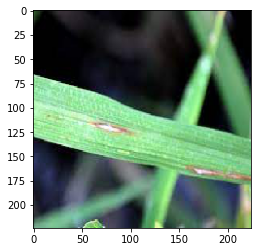

In [118]:
from matplotlib.pyplot import imshow
imshow(img)

In [119]:
x=x/255

In [120]:
x


array([[[0.21176471, 0.35686275, 0.1882353 ],
        [0.20392157, 0.34901962, 0.18039216],
        [0.18431373, 0.30980393, 0.16470589],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.20784314, 0.3529412 , 0.18431373],
        [0.2       , 0.34509805, 0.1764706 ],
        [0.18039216, 0.30588236, 0.16078432],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.2       , 0.3372549 , 0.18039216],
        [0.19215687, 0.32941177, 0.17254902],
        [0.16470589, 0.2901961 , 0.14509805],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.3764706 , 0.54901963, 0.45882353],
        [0.38431373, 0.56078434, 0.47058824],
        [0.42745098, 0

In [121]:
import cv2
x = cv2.resize(x,(224,224)) 
x = x.reshape(1,224,224,3) 

In [122]:
x.shape

(1, 224, 224, 3)

In [123]:
model.predict(x)

1/1 [==============================] - 2s 2s/step


array([[0.0000000e+00, 1.8413389e-22, 1.0000000e+00, 1.4661441e-32,
        0.0000000e+00, 1.1794173e-29, 1.2881255e-17, 5.1080759e-12,
        0.0000000e+00]], dtype=float32)

In [124]:
a=model.predict(x)

1/1 [==============================] - 0s 72ms/step


In [125]:
a.argmax()

2

In [126]:
folders

['C:\\Users\\HOME\\Desktop\\train\\Healthy',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Bacterial blight',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Blast',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Brownspot',
 'C:\\Users\\HOME\\Desktop\\train\\Mild Tungro',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Bacterial blight',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Blast',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Brownspot',
 'C:\\Users\\HOME\\Desktop\\train\\Severe Tungro']